In [7]:
# --- SQL Server Connection Test ---
import pyodbc
import pandas as pd

# STEP 1: Check available ODBC drivers
print("🧩 Available ODBC Drivers:")
for driver in pyodbc.drivers():
  print("   ", driver)

# STEP 2: Define connection details
server = "localhost\\SQL2022"             # Change if your instance name differs
database = "Chinook"                      # Change to your database
driver = "SQL Server"                     # Use one listed above
#driver = "ODBC Driver 18 for SQL Server"  # Use one listed above
trusted_connection = "yes"                # or "no" if using SQL auth
encrypt = "no"                            # disable encryption for local

conn_str = ( f"DRIVER={{{driver}}};"
             f"SERVER={server};"
             f"DATABASE={database};"
             f"Trusted_Connection={trusted_connection};"
             f"Encrypt={encrypt};" )

print("\n🔗 Connecting with:")
print(conn_str)

# STEP 3: Test connection and query
try:
  with pyodbc.connect(conn_str) as conn:
    query = "SELECT TOP 5 name, database_id FROM sys.databases;"
    df = pd.read_sql(query, conn)
    print("\n✅ Connection successful! Sample query output:")
    display(df)
except Exception as e:
  print("\n❌ Connection failed!")
  print(str(e))


🧩 Available ODBC Drivers:
    SQL Server
    ODBC Driver 17 for SQL Server
    ODBC Driver 18 for SQL Server
    Microsoft Access Driver (*.mdb, *.accdb)
    Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
    Microsoft Access Text Driver (*.txt, *.csv)
    Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)

🔗 Connecting with:
DRIVER={SQL Server};SERVER=localhost\SQL2022;DATABASE=Chinook;Trusted_Connection=yes;Encrypt=no;

✅ Connection successful! Sample query output:


C:\Users\randel.bjorkquist\AppData\Local\Temp\ipykernel_73524\1208281810.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,name,database_id
0,master,1
1,tempdb,2
2,model,3
3,msdb,4
4,DWDiagnostics,5


In [8]:
#import pyodbc
#import pandas as pd
#
#conn_str = ( "DRIVER={ODBC Driver 18 for SQL Server};"
#             "SERVER=localhost\\SQL2022;"
#             "DATABASE=Chinook;"
#             "Trusted_Connection=yes;"
#             "Encrypt=no;" )
#
#conn = pyodbc.connect(conn_str)
#
#query = "SELECT TOP 10 * FROM dbo.Employee"
#df = pd.read_sql(query, conn)
#df.head()

#IMPORTANT WARNING:
#C:\Users\randel.bjorkquist\AppData\Local\Temp\ipykernel_74376\3504717152.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
# df = pd.read_sql(query, conn)

In [9]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("mssql+pyodbc://localhost\\SQL2022/Chinook?driver=ODBC+Driver+18+for+SQL+Server&trusted_connection=yes&Encrypt=no")

df = pd.read_sql( "SELECT TOP 10 * FROM dbo.Employee"
                 ,engine )
df.head()


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


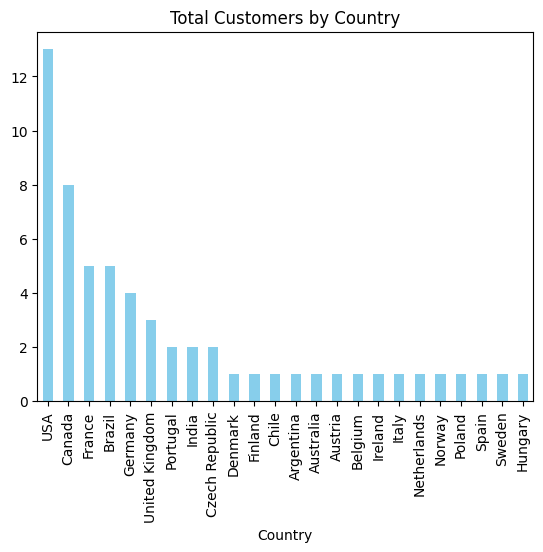

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#command = "SELECT C.Country AS 'Country', COUNT(*) AS 'TotalCustomers' FROM Customer AS C GROUP BY C.Country ORDER BY TotalCustomers DESC;"
command = """
SELECT C.Country  AS 'Country'
      ,COUNT(*)   AS 'Total Customers'
FROM dbo.Customer AS C
GROUP BY C.Country
ORDER BY [Total Customers] DESC;
"""

df = pd.read_sql(command, engine)
df.head()
df.plot.bar( x = 'Country'
            ,y = 'Total Customers'
            ,color = 'skyblue'
            ,legend = False )
plt.title('Total Customers by Country')
plt.show()

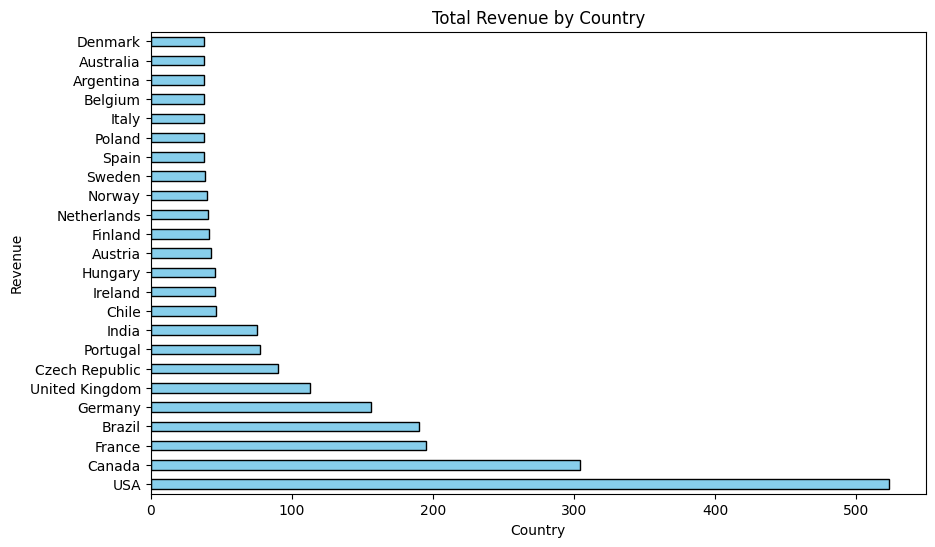

In [11]:
command = """
SELECT I.BillingCountry AS 'Country'
      ,SUM(I.Total)     AS 'Revenue'
  FROM Invoice AS I
GROUP BY BillingCountry
ORDER BY Revenue DESC;
"""

df = pd.read_sql(command, engine)
df.plot.barh( x = 'Country'
             ,y = 'Revenue'
             ,title = 'Revenue by Country'
             ,xlabel = 'Country'
             ,ylabel = 'Revenue'
             ,legend = False
             ,color = 'skyblue'
             ,edgecolor = 'black'
             ,figsize = (10, 6) )

plt.title('Total Revenue by Country')
plt.show()

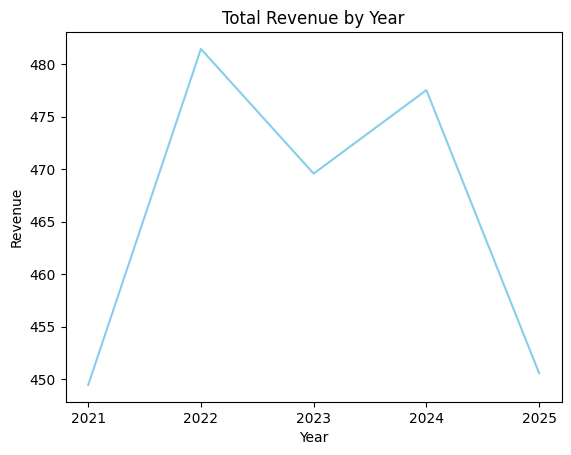

In [12]:
command = """
SELECT DATEPART(YEAR, I.InvoiceDate) AS 'Year'
      ,SUM(I.Total)                  AS 'Revenue'
  FROM Invoice AS I
GROUP BY DATEPART(YEAR, I.InvoiceDate)
ORDER BY 'Year' ASC;
"""
df = pd.read_sql(command, engine)
df['Year'] = df['Year'].astype(int)

sns.lineplot( data = df
              ,x = 'Year'
              ,y = 'Revenue'
              ,color = 'skyblue' )

plt.title('Total Revenue by Year')
plt.xticks(df['Year'])
plt.show()

### Option 1 – Convert to int before plotting
```python
df['Year'] = df['Year'].astype(int)

sns.lineplot(data=df, x='Year', y='Revenue', color='skyblue')
plt.title('Total Revenue by Year')
plt.xticks(df['Year'])  # show exact years only
plt.show()
```
This is usually the best solution — it keeps the axis numeric but clean.

### Option 2 – Force integer tick labels

If you don’t want to modify the DataFrame:
```python
sns.lineplot(data=df, x='Year', y='Revenue', color='skyblue')
plt.title('Total Revenue by Year')
plt.xticks(df['Year'].unique().astype(int))  # only integer labels
plt.show()
```

### Option 3 – Treat Year as categorical

If you prefer it as discrete categories:

```python
sns.lineplot(data=df, x=df['Year'].astype(str), y='Revenue', color='skyblue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.show()
```

Best Practice Recommendation:
Option 1 (convert to int) is the most robust when your source SQL uses DATEPART(YEAR, …) — it ensures future plots (bar, regression, etc.) treat years as true numeric values while keeping axis labels clean.